In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

df = pd.read_csv('Crop_recommendation.csv')

print(f"Number of rows, columns in Dataset = {df.shape}")
df.head(10)

df.info()
print("________________________________________________")
print(df.isnull().sum())
print(df['label'].value_counts())


le = LabelEncoder()
df['crop_num'] = le.fit_transform(df['label'])
df.drop(['label'], axis=1, inplace=True)
df.head(10)

X = df.drop(['crop_num'], axis=1)
y = df['crop_num']

print(f"X shape: {X.shape} Y shape: {y.shape}")


Number of rows, columns in Dataset = (2200, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
________________________________________________
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil 

In [ ]:
# 85% train+validation and 15% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)

print(f"Train size: {X_train.shape[0]} samples")
print(f"Validation size: {X_val.shape[0]} samples")
print(f"Test size: {X_test.shape[0]} samples")

ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_val = ms.transform(X_val)
X_test = ms.transform(X_test)

print("Scaling done.")


Train size: 1539 samples
Validation size: 331 samples
Test size: 330 samples
Scaling done.


In [56]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_val = rf.predict(X_val)
y_pred_test = rf.predict(X_test)

rf_train = accuracy_score(y_train, y_pred_train)
rf_val = accuracy_score(y_val, y_pred_val)
rf_test = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {rf_train:.4f}")
print(f"Validation Accuracy: {rf_val:.4f}")
print(f"Test Accuracy: {rf_test:.4f}")

print("Confusion matrix (Test Set):")
print(confusion_matrix(y_test, y_pred_test))


Training Accuracy: 1.0000
Validation Accuracy: 0.9940
Test Accuracy: 0.9939
Confusion matrix (Test Set):
[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0

In [62]:
import pickle

objects_to_save = {
    'model': rf,
    'scaler': ms,
    'label_encoder': le
}

with open('crop_recommendation_pipeline.pkl', 'wb') as f:
    pickle.dump(objects_to_save, f)

print("Model, scaler, and label encoder saved.")


Model, scaler, and label encoder saved.


In [57]:
accuracies = {
    "XGBoost": {"train": 0, "validation": 0, "test": 0},
    "GradientBoosting": {"train": 0, "validation": 0, "test": 0},
    "LogisticRegression": {"train": 0, "validation": 0, "test": 0}
}

def evaluate_and_store(model, name):
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)

    accuracies[name]["train"] = accuracy_score(y_train, y_pred_train)
    accuracies[name]["validation"] = accuracy_score(y_val, y_pred_val)
    accuracies[name]["test"] = accuracy_score(y_test, y_pred_test)

xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(max_iter=5000, random_state=42)

xgb.fit(X_train, y_train)
gbc.fit(X_train, y_train)
lr.fit(X_train, y_train)

evaluate_and_store(xgb, "XGBoost")
evaluate_and_store(gbc, "GradientBoosting")
evaluate_and_store(lr, "LogisticRegression")

print(accuracies)


{'XGBoost': {'train': 1.0, 'validation': 0.9818731117824774, 'test': 0.9787878787878788}, 'GradientBoosting': {'train': 1.0, 'validation': 0.9758308157099698, 'test': 0.9757575757575757}, 'LogisticRegression': {'train': 0.9512670565302144, 'validation': 0.9425981873111783, 'test': 0.9151515151515152}}


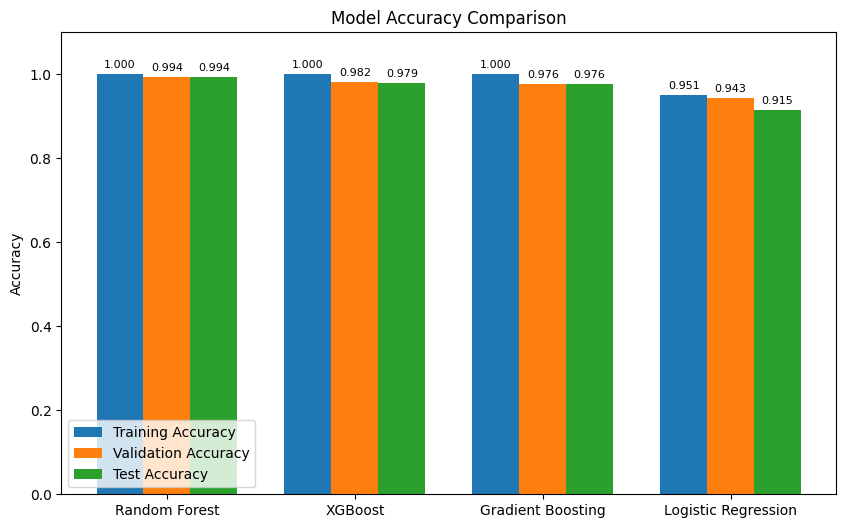

In [58]:
models = ['Random Forest', 'XGBoost', 'Gradient Boosting', 'Logistic Regression']

train_accuracies = [rf_train, accuracies['XGBoost']['train'], accuracies['GradientBoosting']['train'], accuracies['LogisticRegression']['train']]
val_accuracies = [rf_val, accuracies['XGBoost']['validation'], accuracies['GradientBoosting']['validation'], accuracies['LogisticRegression']['validation']]
test_accuracies = [rf_test, accuracies['XGBoost']['test'], accuracies['GradientBoosting']['test'], accuracies['LogisticRegression']['test']]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width, train_accuracies, width, label='Training Accuracy')
rects2 = ax.bar(x, val_accuracies, width, label='Validation Accuracy')
rects3 = ax.bar(x + width, test_accuracies, width, label='Test Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1.1)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()


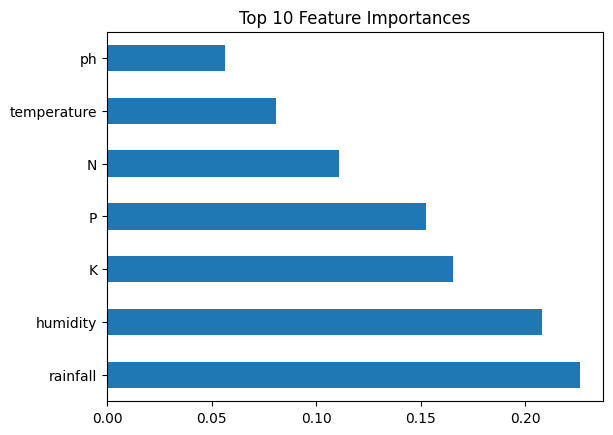

In [59]:
feature_names = X.columns
feat_importances = pd.Series(rf.feature_importances_, index=feature_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()


In [ ]:
rf_orig = RandomForestClassifier(random_state=42, n_estimators=100)
rf_orig.fit(X_train, y_train)

y_pred_orig = rf_orig.predict(X_test)
orig_acc = accuracy_score(y_test, y_pred_orig)
print(f"Original Test Accuracy: {orig_acc:.4f}")

# Shuffle training labels
y_train_shuffled = shuffle(y_train, random_state=42)

# Train model on shuffled labels
rf_perm = RandomForestClassifier(random_state=42, n_estimators=100)
rf_perm.fit(X_train, y_train_shuffled)

y_pred_perm = rf_perm.predict(X_test)
perm_acc = accuracy_score(y_test, y_pred_perm)
print(f"Test Accuracy after Label Shuffling: {perm_acc:.4f}")

if perm_acc >= orig_acc:
    print("Warning: Possible overfitting or data leakage.")
else:
    print("No overfitting indicated by permutation test.")


Original Test Accuracy: 0.9939
Test Accuracy after Label Shuffling: 0.0758
No overfitting indicated by permutation test.


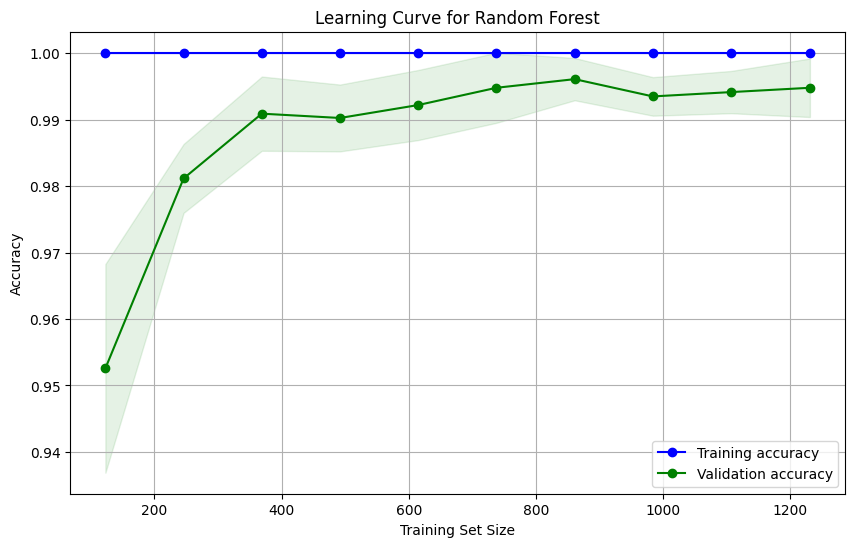

In [61]:
train_sizes, train_scores, val_scores = learning_curve(
    rf,
    X_train, y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

plt.plot(train_sizes, val_mean, 'o-', color='green', label='Validation accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')

plt.title('Learning Curve for Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()
